<a href="https://colab.research.google.com/github/ashish-ty/Image_Restoration/blob/main/Project_superResolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import cv2
import glob
import tensorflow as tf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [2]:
! pip install kaggle

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d jessicali9530/lfw-dataset

 93% 105M/112M [00:05<00:00, 18.4MB/s] 
100% 112M/112M [00:05<00:00, 21.5MB/s]


In [ ]:
! unzip lfw-dataset.zip

In [8]:
face_images = glob.glob('/content/lfw-deepfunneled/lfw-deepfunneled/**/*.jpg') 

In [9]:
import pickle

images = np.zeros((len(face_images),120,120,3))
# print(images)
for i in range(len(face_images)):
  img = tf.keras.preprocessing.image.load_img(face_images[i], target_size=(120,120,3))
  img = tf.keras.preprocessing.image.img_to_array(img)
  images[i] = img

In [10]:
#Splitting
import random

random_nums = random.sample(range(0,1000),100)
x_test = np.zeros((100,120,120,3))
x_train = np.zeros((900,120,120,3))


tt=0
tr=0
# print(images)
for i in range(0,1000):
  if i not in random_nums:
    x_train[tt] = images[i]
    tt = tt + 1
  else:
    x_test[tr] = images[i]
    tr = tr + 1


In [11]:
x_test_low = np.zeros((100,240,240,3))
x_train_low = np.zeros((900,240,240,3))
scale_y=2
for i in range(0,900):
  x_train_low[i]=cv2.resize(x_train[i], None,fx=scale_y, fy=scale_y, interpolation=cv2.INTER_CUBIC)

x_test_blur=x_test
for i in range(0,100):
  x_test_low[i]=cv2.resize(x_test[i],None, fx=scale_y, fy=scale_y, interpolation=cv2.INTER_CUBIC)

In [17]:
x_train = x_train/255
x_test = x_test/255
x_train_low = x_train_low/255
x_test_low = x_test_low/255

In [12]:
model = models.Sequential()

model.add(layers.Conv2D(64, (9, 9), strides = 1, padding = 'same', activation='relu',input_shape=(240,240,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (7, 7), strides = 1, padding = 'same',activation='relu'))
# model.add(layers.UpSampling2D())

model.add(layers.Conv2D(32, (5, 5), strides = 1, padding = 'same',activation='relu'))
model.add(layers.Conv2D(3, (3, 3), strides = 1, padding = 'same',activation='relu'))




model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 240, 240, 64)      15616     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 120, 120, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 120, 120, 64)      200768    
                                                                 
 conv2d_2 (Conv2D)           (None, 120, 120, 32)      51232     
                                                                 
 conv2d_3 (Conv2D)           (None, 120, 120, 3)       867       
                                                                 
Total params: 268,483
Trainable params: 268,483
Non-trainable params: 0
__________________________________________________

In [25]:
model.compile(loss = 'mse', optimizer = 'adam',metrics=['accuracy'])

with tf.device('/device:GPU:0'):
    model.fit(x_train_low.reshape(-1, 240, 240, 3), x_train.reshape(-1, 120, 120, 3), epochs = 500, batch_size = 128, 
              validation_data = (x_test_low.reshape(-1, 240, 240, 3), x_test.reshape(-1, 120, 120, 3)))

Epoch 1/500
8/8 [==============================] - 7s 824ms/step - loss: 0.0446 - accuracy: 0.7385 - val_loss: 0.0467 - val_accuracy: 0.6573
Epoch 2/500
8/8 [==============================] - 6s 797ms/step - loss: 0.0221 - accuracy: 0.6856 - val_loss: 0.0098 - val_accuracy: 0.7103
Epoch 3/500
8/8 [==============================] - 6s 797ms/step - loss: 0.0071 - accuracy: 0.7491 - val_loss: 0.0041 - val_accuracy: 0.7270
Epoch 4/500
8/8 [==============================] - 6s 800ms/step - loss: 0.0049 - accuracy: 0.7388 - val_loss: 0.0035 - val_accuracy: 0.7779
Epoch 5/500
8/8 [==============================] - 6s 801ms/step - loss: 0.0034 - accuracy: 0.7808 - val_loss: 0.0026 - val_accuracy: 0.7932
Epoch 6/500
8/8 [==============================] - 6s 803ms/step - loss: 0.0027 - accuracy: 0.7930 - val_loss: 0.0024 - val_accuracy: 0.7971
Epoch 7/500
8/8 [==============================] - 7s 804ms/step - loss: 0.0023 - accuracy: 0.8013 - val_loss: 0.0021 - val_accuracy: 0.7937
Epoch 8/500
8

In [26]:

#utility function to pick samples to be tested
def get_samples(arr, n):
    temp = random.sample(range(len(arr)), n)
    result = arr[temp]
    return result, temp

In [27]:
num = 10
org, temp = get_samples(x_train, num)
low_res = x_train_low[temp]
preds = model.predict(low_res)

Original Images


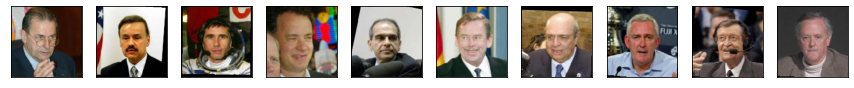

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Images with noise


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


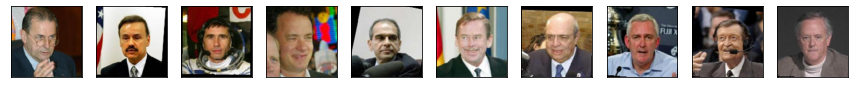

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Predicted Images


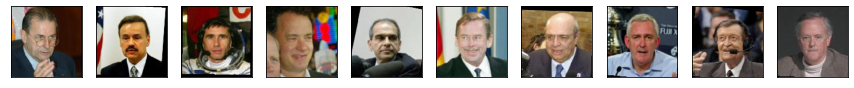

In [28]:
plt.figure(figsize = (15, 15))
print('Original Images')
for i in range(num):
    plt.subplot(1, num, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(org[i], cmap=plt.cm.binary)
plt.show()

plt.figure(figsize = (15, 15))
print('Images with noise')
for i in range(num):
    plt.subplot(1, num, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(low_res[i], cmap=plt.cm.binary)
plt.show()

plt.figure(figsize = (15, 15))
print('Predicted Images')
for i in range(num):
    plt.subplot(1, num, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(preds[i], cmap=plt.cm.binary)
plt.show()

(120, 120, 3)


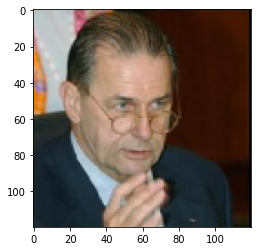

In [29]:
 plt.imshow(org[0], cmap=plt.cm.binary)
 print(org[0].shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(240, 240, 3)


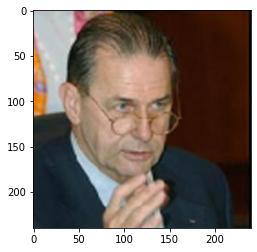

In [30]:
 plt.imshow(low_res[0], cmap=plt.cm.binary)
 print(low_res[0].shape)

(120, 120, 3)


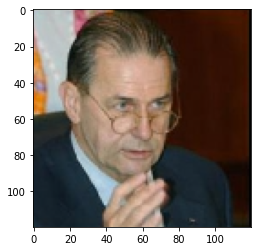

In [31]:
 plt.imshow(preds[0], cmap=plt.cm.binary)
 print(preds[0].shape)